### Prediction model for salary_hike

In [28]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load salary data
salary = pd.read_csv("Salary_Data.csv")
salary

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

### EDA and Data Visualization

In [3]:
salary.shape

(30, 2)

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
salary.describe()

YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

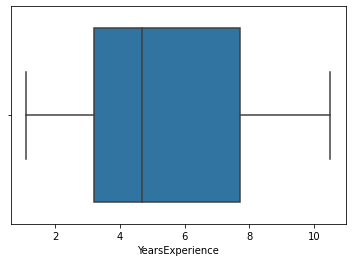

In [7]:
sns.boxplot(salary['YearsExperience'], orient = 'h')

- The data for Year Experience is skewed right.
- All the observations lies in the intervals of approximately 3 to 8
- We can say that the median years of experience is 5.2 years.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

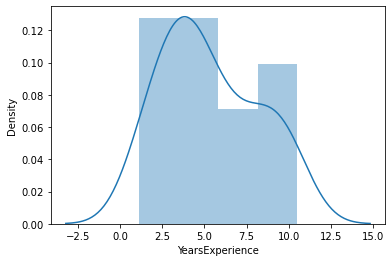

In [8]:
sns.distplot(salary['YearsExperience'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

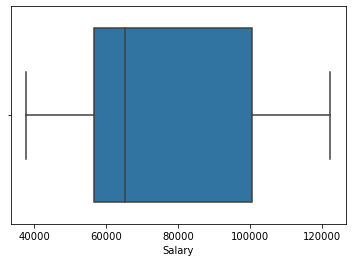

In [9]:
sns.boxplot(salary['Salary'])

- The onservations for Salary lies nearly between 57000 to 110000.
- The data is skewed towars right side.
- The median Salary is nearly 65000.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

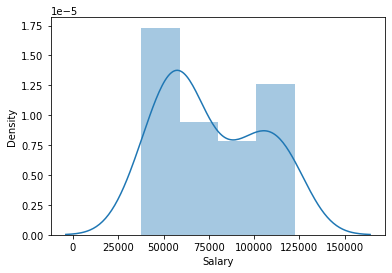

In [10]:
sns.distplot(salary['Salary'])

### Correlation anlysis

In [11]:
salary.corr()

YearsExperience    Salary
YearsExperience         1.000000  0.978242
Salary                  0.978242  1.000000

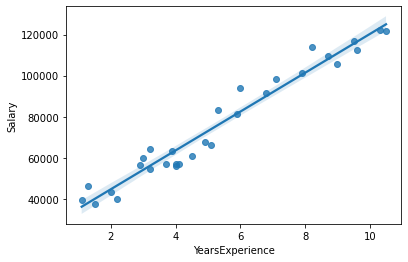

In [12]:
sns.regplot(x="YearsExperience", y="Salary",data=salary);

- There is a strong relation between both variables
- so we can build prediction model

### Model Building

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data=salary).fit()

In [14]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [15]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [16]:
model.rsquared

0.9569566641435086

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        09:58:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R-squared is greater than 0.85 so we can use this model for prediction

### Model prediction

In [18]:
#Predict for newdata
#add new data
newdata = pd.Series([11,12,12.5,13,13.5,14,15])

In [19]:
#create dataframe for newdata
data_pred = pd.DataFrame(newdata,columns=["YearsExperience"])
data_pred

YearsExperience
0             11.0
1             12.0
2             12.5
3             13.0
4             13.5
5             14.0
6             15.0

In [20]:
#predict for newdata
model.predict(data_pred)

0    129741.785735
1    139191.748056
2    143916.729217
3    148641.710378
4    153366.691538
5    158091.672699
6    167541.635020
dtype: float64

In [21]:
model.predict(salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [23]:
pred = model.predict(salary.iloc[:,0])
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [24]:
model.resid
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [26]:
RMSE = np.sqrt(np.mean((np.array(salary['YearsExperience'])- np.array(pred))**2))
RMSE

80440.84508275456

Text(0, 0.5, 'Salary')

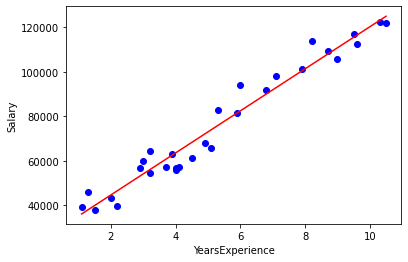

In [29]:
plt.scatter(x=salary['YearsExperience'],y=salary['Salary'],color='blue')
plt.plot(salary['YearsExperience'],pred,color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [32]:
df_new = pd.DataFrame({"YearsExperience":[10,12,11,10.5]})
df_new

YearsExperience
0             10.0
1             12.0
2             11.0
3             10.5

In [33]:
model.predict(df_new)

0    120291.823413
1    139191.748056
2    129741.785735
3    125016.804574
dtype: float64

 ### Predict delivery time using sorting time


In [35]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [36]:
time_data = pd.read_csv("delivery_time.csv")
time_data

Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5

### EDA and Data visualization

In [37]:
time_data.shape

(21, 2)

In [38]:
time_data.head()

Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

In [39]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [40]:
time_data.describe()

Delivery Time  Sorting Time
count      21.000000     21.000000
mean       16.790952      6.190476
std         5.074901      2.542028
min         8.000000      2.000000
25%        13.500000      4.000000
50%        17.830000      6.000000
75%        19.750000      8.000000
max        29.000000     10.000000

In [41]:
#Renaming the columns
time_data = time_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [42]:
time_data.head()

delivery_time  sorting_time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

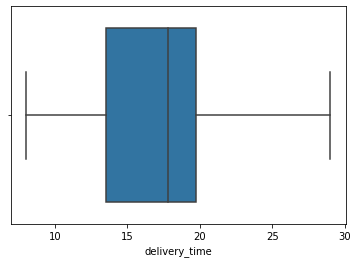

In [43]:
sns.boxplot(time_data['delivery_time'], orient = 'h')

- The data for Delivery time is skewed left.
- All the observations lies in the intervals of approximately 13 to 20
- We can say that the median delivery time is around 18-19.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

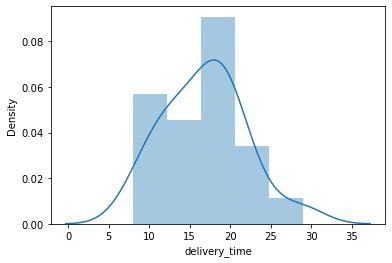

In [44]:
sns.distplot(time_data['delivery_time'])

- The distribution of 'Delivery Time' data is slightly more on the left of the curve 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

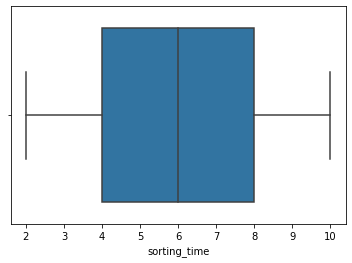

In [45]:
sns.boxplot(time_data['sorting_time'], orient='h')

- The observations for Sorting Time lies nearly between 4 to 8.
- It means the Sorting Time data is symmetric and skewed.
- The median sorting time is approximately around 6.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

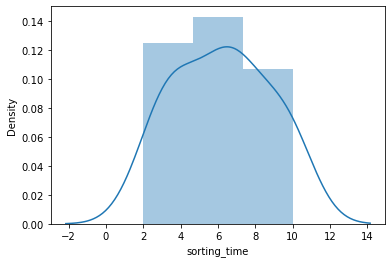

In [46]:
sns.distplot(time_data['sorting_time'])

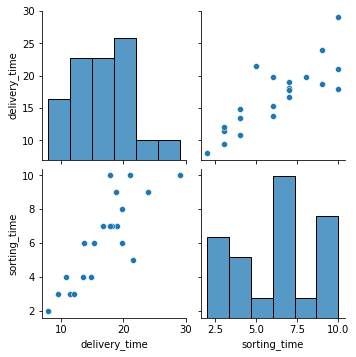

In [47]:
sns.pairplot(time_data)

### Correlation analysis

In [48]:
time_data.corr()

delivery_time  sorting_time
delivery_time       1.000000      0.825997
sorting_time        0.825997      1.000000

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

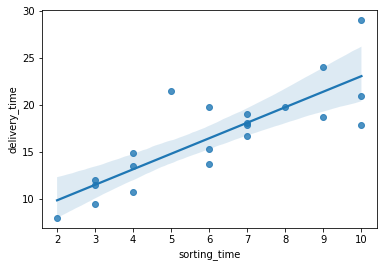

In [49]:
sns.regplot(x="sorting_time", y="delivery_time",data=time_data)

### Model Building

In [51]:
import statsmodels.formula.api as smf
model1 = smf.ols("delivery_time~sorting_time",data=time_data).fit()
model1

### Model testing

In [52]:
model1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [53]:
model1.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        10:12:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
model1.rsquared

0.6822714748417231

### Model Prediction

In [56]:
newdata1 = pd.Series([9,5,7,9,6,5])

In [57]:
data_pred1 = pd.DataFrame(newdata1,columns=['sorting_time'])

In [58]:
data_pred1

sorting_time
0             9
1             5
2             7
3             9
4             6
5             5

In [59]:
model1.predict(data_pred1)

0    21.423913
1    14.827833
2    18.125873
3    21.423913
4    16.476853
5    14.827833
dtype: float64

In [60]:
model1.predict(time_data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [61]:
pred = model1.predict(time_data)

In [62]:
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [63]:
model1.resid
model1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [65]:
RMSE = np.sqrt(np.mean((np.array(time_data['sorting_time'])- np.array(pred))**2))
RMSE

10.722052392104557

In [66]:
model1 = smf.ols("delivery_time~np.log(sorting_time)", data = time_data).fit()

In [68]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        10:17:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
RMSE_log = np.sqrt(np.mean((np.array(time_data['sorting_time'])- np.array(pred))**2))
RMSE_log

10.722052392104557

In [70]:
model2 = smf.ols("np.log(delivery_time)~sorting_time", data= time_data).fit()

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 15 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                           10:20:44   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
RMSE_log = np.sqrt(np.mean((np.array(time_data['sorting_time'])- np.array(pred))**2))
RMSE_log

10.722052392104557

In [73]:
model3 = smf.ols("np.log(delivery_time)~np.log(sorting_time)", data= time_data).fit()

In [74]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 15 Oct 2022   Prob (F-statistic):           1.60e-07
Time:                           10:24:06   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
actual = time_data.delivery_time
pred = model3.predict(time_data)
residual = actual - pred

In [78]:
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [80]:
newdata = pd.DataFrame({'sorting_time':[10,6,5,7,8]})
newdata

sorting_time
0            10
1             6
2             5
3             7
4             8

In [81]:
model3.predict(newdata)

0    3.117833
1    2.812603
2    2.703662
3    2.904712
4    2.984500
dtype: float64

### Model Deletion Techniques

In [82]:
#detecting outlires/influencers
#Cook's distance

In [84]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [85]:
(np.argmax(c),np.max(c))

(23, 0.131754523131353)

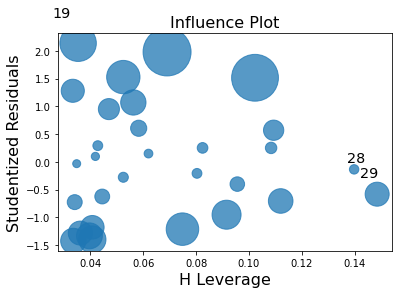

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [88]:
k = time_data.shape[1]
n = time_data.shape[0]
leverage_cutoff = 3*((k +1)/n)
leverage_cutoff

0.42857142857142855

In [89]:
time_data[time_data.index.isin([7,18])]

delivery_time  sorting_time
7             9.5             3
18            8.0             2

In [90]:
#The diiference in HP and other variable values
time_data.head()

delivery_time  sorting_time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10

### Improving the model

In [91]:
#Load dataset
time_new = pd.read_csv("delivery_time.csv")

In [92]:
#Remove the data points which are influencers reset index
time1 = time_new.drop(time_new.index[[7,18]],axis=0).reset_index()

In [93]:
#Drop original index
time1 = time1.drop(['index'],axis=1)

In [94]:
time1

Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7           17.90            10
8           18.75             9
9           19.83             8
10          10.75             4
11          16.68             7
12          11.50             3
13          12.03             3
14          14.88             4
15          13.75             6
16          18.11             7
17          17.83             7
18          21.50             5

In [96]:
time1=time1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

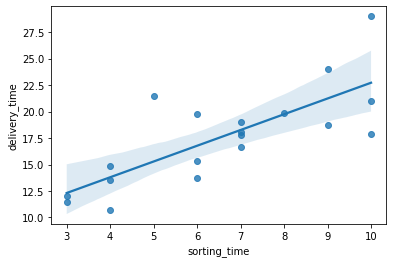

In [97]:
sns.regplot(x= time1['sorting_time'], y= time1['delivery_time'],data = time1)

In [98]:
model4 = smf.ols("delivery_time~sorting_time", data = time1).fit()

In [99]:
newdata2 = pd.DataFrame({'sorting_time': [9,7,5,6,10]})

In [100]:
newdata2

sorting_time
0             9
1             7
2             5
3             6
4            10

In [102]:
model4.predict(newdata2)

0    21.240021
1    18.263917
2    15.287812
3    16.775864
4    22.728074
dtype: float64

In [101]:
model4.predict(time1)

0     22.728074
1     13.799760
2     16.775864
3     21.240021
4     22.728074
5     16.775864
6     18.263917
7     22.728074
8     21.240021
9     19.751969
10    13.799760
11    18.263917
12    12.311708
13    12.311708
14    13.799760
15    16.775864
16    18.263917
17    18.263917
18    15.287812
dtype: float64